In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
dataFrame = pd.read_excel(".\\merc.xlsx")

## 1) Veriyi İnceleme Aşaması

Öncelikle veri setimizin genel özelliklerini gösteren tabloyu inceleyelim

In [3]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


1 - Verilerin içinde boş değer var mı

In [4]:
dataFrame.isnull().sum()

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

Veri setimizin içinde boş değer olmadığını görüyoruz.

2 - Veri setimizin fiyat içeriklerini gözlemleyelim

<Figure size 700x500 with 0 Axes>

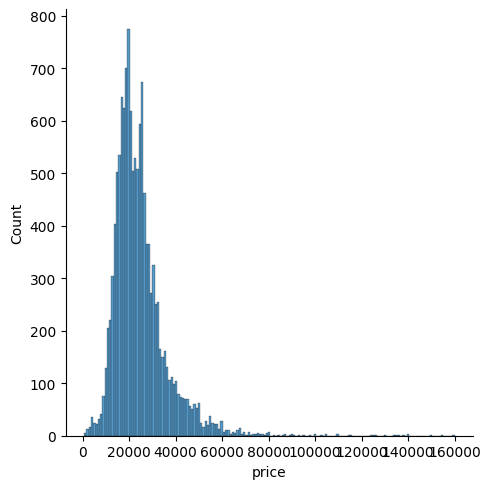

In [5]:
plt.figure(figsize=(7,5))
sbn.displot(dataFrame["price"])

Gördüğümüz gibi 60000£ değerinden yüksek fiyatlı araçlar verimizde sıkıntı oluşturabilir.

3 - Veri setimizin yıl dağılımını inceleyelim

<AxesSubplot: xlabel='year', ylabel='count'>

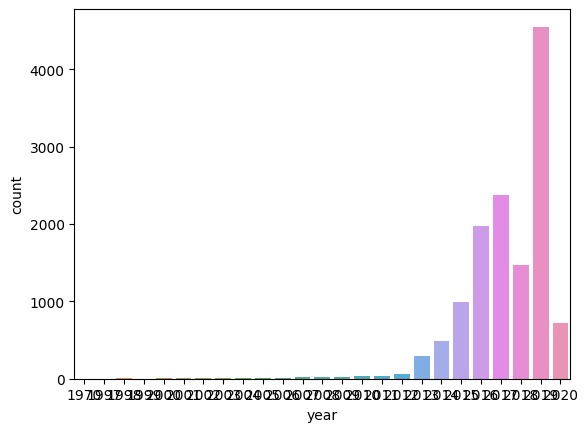

In [6]:
sbn.countplot(x= dataFrame["year"])

Veri setimizdeki arabaların çoğunlukla son yıllarda çıkmış olduğunu görebilirouz.

4 - Veri setimizdeki fiyatların hangi diğer özelliklerle ne kadar ilişkili olduğuna bakalım

In [7]:
dataFrame.corr()["price"].sort_values()

C:\Users\Abdullah\AppData\Local\Temp\ipykernel_34452\625300545.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataFrame.corr()["price"].sort_values()


mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

Araçların fiyatları ile diğer özellikleri arasındaki ilişkinin sıralanmış hali yukardaki gibi. Listeyi inceleiğimizde pozitif değerlerin doğu orantılı, negatif değerlerin ise ters orantılı olduğunu anlayabiliriz. Değerlerin büyüklükleri ise veriler arasındaki ilişki düzeyi olarak adlandırabiliriz.

5 - Veri setimizdeki araçların fiyatları ile diğer özellikleri bir grafik haline getirelim. Örnek olarak mileage-price ilişkisinin grafiğini çizelim.

<AxesSubplot: xlabel='mileage', ylabel='price'>

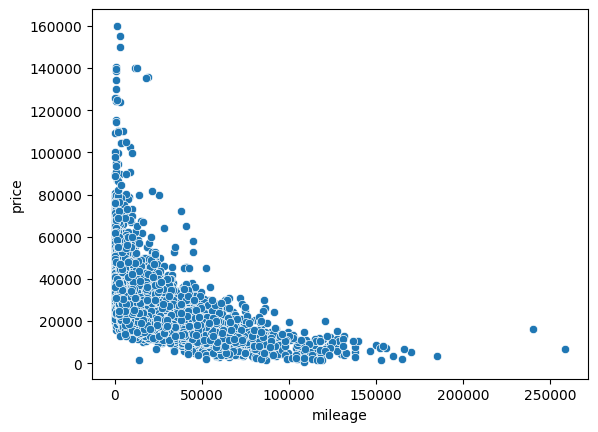

In [8]:
sbn.scatterplot(x="mileage", y="price", data=dataFrame)

Grafikten de rahatça anlaşılabileceği gibi ters orantılı ilişki görmekteyiz.

## 2) Veriyi Düzenleme Aşaması

1 - Öncelikle veri setimizi fiyatına göre küçükten büyüğe (ascending= True) bir şekilde sıralayıp ilk 20 satırı gözlemleyelim. Küçükten büyüğe sıralamamızın sebebi verşmizdeki arabalarının büyük çoğunluğunun ucuz olmasından kaynaklı.

In [9]:
dataFrame.sort_values("price", ascending= True).head(20)

,year,price,transmission,mileage,tax,mpg,engineSize
11816,2003,650,Manual,109090,235,40.0,1.4
12008,2010,1350,Manual,116126,145,54.3,2.0
11765,2000,1490,Automatic,87000,265,27.2,3.2
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11174,2001,1695,Automatic,108800,325,31.7,3.2
12710,2006,1695,Automatic,153000,300,33.6,1.8
12766,2004,1780,Automatic,118000,265,41.5,2.2
12009,2007,1800,Automatic,84000,200,42.8,1.5
11764,1998,1990,Automatic,99300,265,32.1,2.3


2 - Veri setimizdeki çok yüksek fiyatlı araçlar verimizde karmaşıklık oluşturacağından ve tüm verinin %99'luk kısmının yeterli olacağını düşündüğümüzden en pahalı,

In [10]:
len(dataFrame) * 0.01

131.19

131 aracı veri setimizden çıkartalım ve bunu yeni oluşturduğumuz dataframe'ye atayalım.

In [11]:
yeniDataFrame = dataFrame.sort_values("price", ascending= False).iloc[131:]

Oluşturduğumuz yeni dataframe eskisinin %99'luk kısmını içermekte.

3 - yeniDataFrame'mizin özelliklerini inceleyelim

In [12]:
yeniDataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


4 - yeniDataFrame'mizin fiyat dağılımını bir grafik üzerinde inceleyelim.

<Figure size 700x500 with 0 Axes>

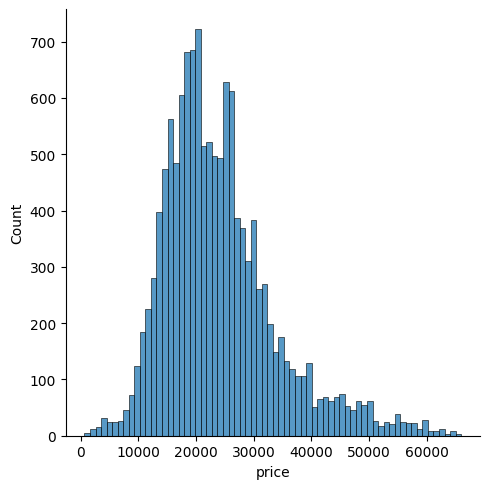

In [13]:
plt.figure(figsize=(7,5))
sbn.displot(yeniDataFrame["price"])

Veri setimiz eskisinde göre daha düzgün dağılmış durumda

5 - yeniDataFrame içerisindeki verileri yıllara göre gruplayıp ortalama fiyatlarını inceleyelim.

In [14]:
yeniDataFrame.groupby("year").mean()["price"]

C:\Users\Abdullah\AppData\Local\Temp\ipykernel_34452\1034697591.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yeniDataFrame.groupby("year").mean()["price"]


year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

1970 yılında üretilen araçlar için absürt bir fiyat görmekteyiz. Bu veriler, veri setimizin üzerinde çalışmayı zorlaştırıyor olabilir.

6 - İstersek 1970 yılıda üretilen araçları veri setimizin içerisinden çıkartabiliriz.

In [15]:
yeniDataFrame = yeniDataFrame[yeniDataFrame.year != 1970]

In [16]:
yeniDataFrame.groupby("year").mean()["price"]

C:\Users\Abdullah\AppData\Local\Temp\ipykernel_34452\1034697591.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yeniDataFrame.groupby("year").mean()["price"]


year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

Veri setimiz bu haliyle daha anlaşılabilir görünüyor.

7 - Veri setimizi tekrardan gözden geçirelim.

In [17]:
yeniDataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0


Veri setimizdeki "transmission" sayısal veri taşımadığından dolayı regresyonda hata verecektir. Hata vermemesi için bu sütunu veri setimizden çıkartalım.

In [18]:
yeniDataFrame = yeniDataFrame.drop("transmission",axis=1)

8 - Son bir kez verimizi inceleyelim.

In [19]:
yeniDataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000
mean,2017.285516,24074.855779,22133.367367,129.676215,55.438392,2.051059
std,2.189633,9866.601115,21197.472376,65.167429,15.025902,0.532313
min,1997.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17355.000000,6320.000000,125.000000,45.600000,1.700000
50%,2018.000000,22299.000000,15371.000000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31986.500000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


In [20]:
yeniDataFrame.head()

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0


Veri setimiz bu hali ile regresyon için uygun görünüyor.

## 3) Veriyi Yapay Zekaya Analiz Ettirme Aşaması

1 - y (aranan) ve x (geriye kalanlar) numpy dizilerimizi oluşturalım

In [21]:
y = yeniDataFrame["price"].values
x = yeniDataFrame.drop("price", axis=1).values

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [24]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [25]:
from keras.models import Sequential
from keras.layers import Dense

In [26]:
model = Sequential()
model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

In [27]:
model.fit(x= x_train, y= y_train,validation_data=(x_test,y_test), batch_size=250, epochs=300)

Epoch 1/300
37/37 [==============================] - 5s 25ms/step - loss: 672134144.0000 - val_loss: 688076032.0000
Epoch 2/300
37/37 [==============================] - 0s 9ms/step - loss: 672062656.0000 - val_loss: 687944000.0000
Epoch 3/300
37/37 [==============================] - 0s 11ms/step - loss: 671804672.0000 - val_loss: 687479040.0000
Epoch 4/300
37/37 [==============================] - 0s 9ms/step - loss: 670970112.0000 - val_loss: 686040768.0000
Epoch 5/300
37/37 [==============================] - 0s 9ms/step - loss: 668564992.0000 - val_loss: 682202752.0000
Epoch 6/300
37/37 [==============================] - 0s 12ms/step - loss: 662666688.0000 - val_loss: 673261952.0000
Epoch 7/300
37/37 [==============================] - 1s 17ms/step - loss: 649825344.0000 - val_loss: 654730624.0000
Epoch 8/300
37/37 [==============================] - 0s 12ms/step - loss: 624407680.0000 - val_loss: 619905216.0000
Epoch 9/300
37/37 [==============================] - 0s 9ms/step - loss: 57

In [28]:
kayipVerisi = pd.DataFrame(model.history.history)
kayipVerisi.head()

,loss,val_loss
0,672134144.0,688076032.0
1,672062656.0,687944000.0
2,671804672.0,687479040.0
3,670970112.0,686040768.0
4,668564992.0,682202752.0


<AxesSubplot: >

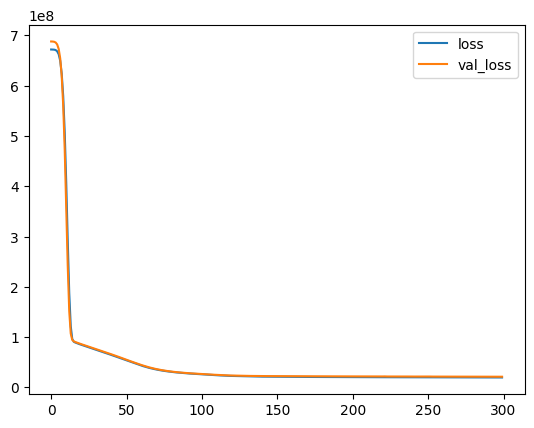

In [29]:
kayipVerisi.plot()

In [30]:
tahminDizisi = model.predict(x_test)

122/122 [==============================] - 0s 2ms/step


In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [32]:
mean_absolute_error(y_test, tahminDizisi)

3238.1264043254428

In [33]:
yeniDataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000
mean,2017.285516,24074.855779,22133.367367,129.676215,55.438392,2.051059
std,2.189633,9866.601115,21197.472376,65.167429,15.025902,0.532313
min,1997.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17355.000000,6320.000000,125.000000,45.600000,1.700000
50%,2018.000000,22299.000000,15371.000000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31986.500000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


24074 - 3184

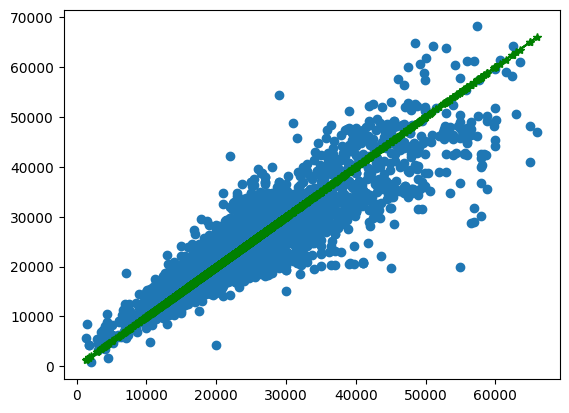

In [34]:
plt.scatter(y_test, tahminDizisi)
plt.plot(y_test, y_test, "g-*")

In [35]:
yeniDataFrame.iloc[2]

year           2020.0
price         65980.0
mileage        3999.0
tax             145.0
mpg              28.0
engineSize        4.0
Name: 3191, dtype: float64

In [36]:
yeniArabaSeries = yeniDataFrame.drop("price", axis=1).iloc[2]

In [37]:
yeniArabaSeries = scaler.transform(yeniArabaSeries.values.reshape(-1,5))

In [38]:
model.predict(yeniArabaSeries)

1/1 [==============================] - 0s 41ms/step


array([[62809.582]], dtype=float32)

SON